# SCENARIO and TASK

You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.

In [1]:
# Lets import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### importing dataset

In [2]:
df1 = pd.read_excel("QVI_transaction_data.xlsx")
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
transaction = df1.copy()

In [4]:
df2 = pd.read_csv("QVI_purchase_behaviour.csv")
purchase_behaviour = df2.copy()
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# Data Preparation

In [5]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
transaction["DATE"] = pd.to_datetime(transaction["DATE"],unit='d', origin= "1899-12-30")

In [7]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [8]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
# Check for null values
transaction.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [10]:
# looking at general statistics of data
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [11]:
transaction['DATE'].value_counts()

2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2018-12-12    664
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
Name: DATE, Length: 364, dtype: int64

<AxesSubplot:>

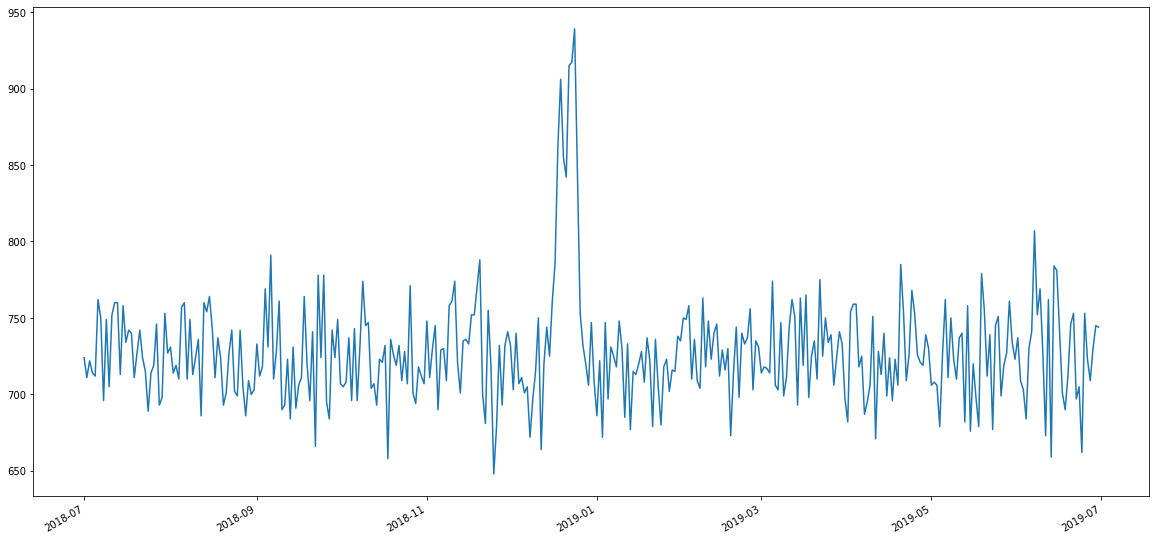

In [12]:
plt.figure(figsize=(20,10))
transaction['DATE'].value_counts().plot()

In [19]:
transaction['DATE'].nunique()
#here we can see there should be 365 records for complete year instead of 364 which means records for a certain date is missing

364

In [13]:
#1 Jul 2018 to 30 Jun 2019
rng = pd.date_range('2018-07-01', periods=365, freq='D')
rng

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10',
               ...
               '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24',
               '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
               '2019-06-29', '2019-06-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [31]:
dt_range=pd.DataFrame(rng, columns=['date'])

In [18]:
trx_count = pd.DataFrame(transaction['DATE'].value_counts()).reset_index()

In [22]:
trx_count.columns= ['date','count']

In [25]:
mdt = dt_range.merge(trx_count, how= 'left', on= 'date')

In [30]:
mdt[mdt['count'].isna()]

,date,count
177,2018-12-25,NaN


here we found out that transactions for Dec-25-2018 are missing

In [32]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Now extracting size of chips packet from PROD_NAME column

In [40]:
transaction['size'] = transaction['PROD_NAME'].str[-4:]

In [41]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g


In [48]:
transaction['size'][transaction['size']=='Salt']

65        Salt
153       Salt
174       Salt
177       Salt
348       Salt
          ... 
264564    Salt
264574    Salt
264725    Salt
264767    Salt
264823    Salt
Name: size, Length: 3257, dtype: object

In [60]:
#here we replace "Salt" variable in size column by "135g".
transaction['size'][transaction['size'] == 'Salt'] = transaction['size'][transaction['size'] == 'Salt'].replace(to_replace= 'Salt', value='135g')

<ipython-input-60-add6cd04d2d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction['size'][transaction['size'] == 'Salt'] = transaction['size'][transaction['size'] == 'Salt'].replace(to_replace= 'Salt', value='135g')


In [71]:
transaction['size'].value_counts()

175g    64929
150g    41633
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6418
270g     6285
200g     4473
135g     3257
250g     3169
210g     3167
210G     3105
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
150G     1498
180g     1468
175G     1461
125g     1454
Name: size, dtype: int64

C:\Users\sachi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size', ylabel='count'>

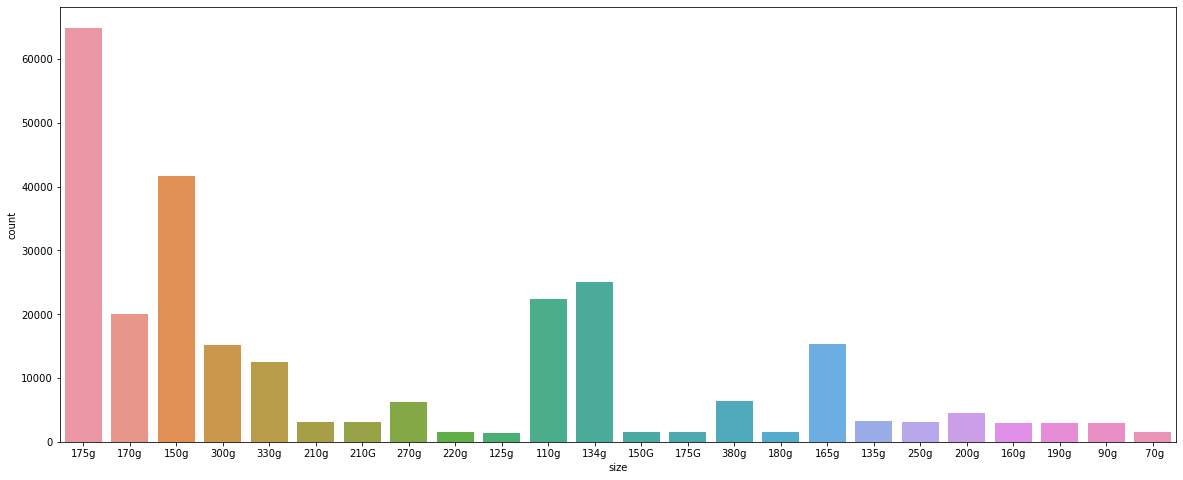

In [80]:
plt.figure(figsize=(20,8))
sns.countplot(transaction['size'])

### Extracting Brand name from PROD_NAME column

In [87]:
transaction['brand'] = transaction['PROD_NAME'].str.split(" ").str[0]

<AxesSubplot:>

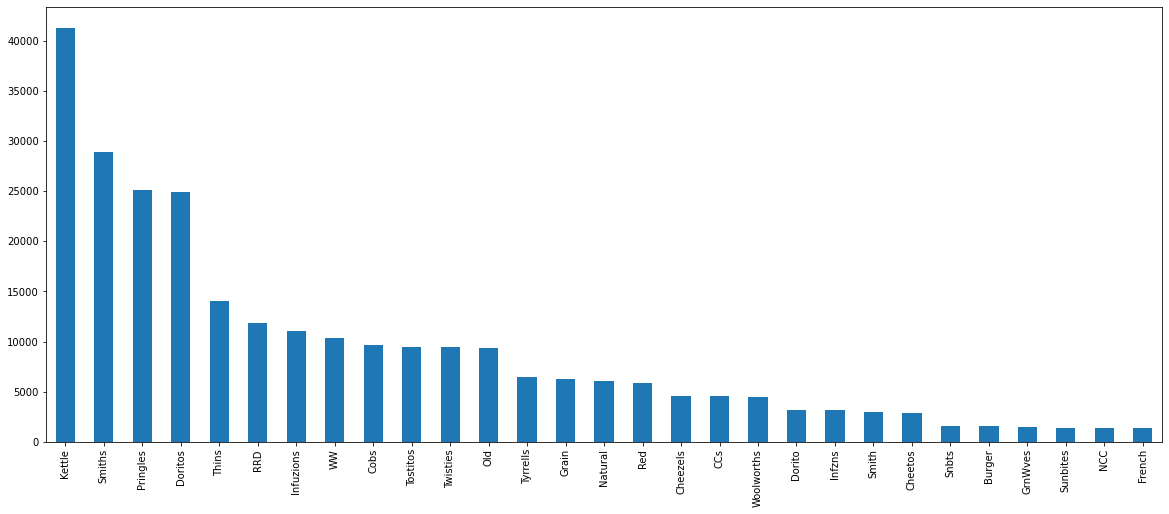

In [91]:
plt.figure(figsize=(20,8))
transaction['brand'].value_counts().plot(kind='bar')

In [93]:
#Exploring purchase behaviour table
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [95]:
#checking for null values if any.
purchase_behaviour.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

<AxesSubplot:>

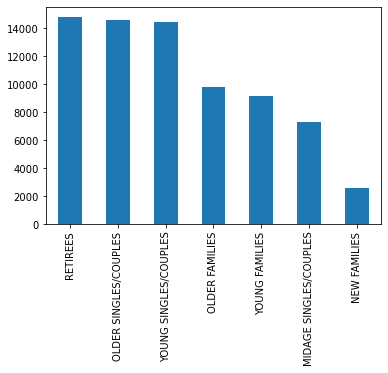

In [99]:
purchase_behaviour['LIFESTAGE'].value_counts().plot(kind ='bar')

<AxesSubplot:>

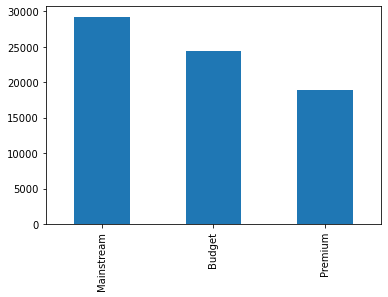

In [101]:
purchase_behaviour['PREMIUM_CUSTOMER'].value_counts().plot(kind='bar')

In [104]:
purchase_behaviour['LYLTY_CARD_NBR'].nunique()

72637

### Now joining transaction table and purchase_behaviour table

In [110]:
merged_df = transaction.merge(purchase_behaviour, how='left', on='LYLTY_CARD_NBR')
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,size,brand,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [112]:
#Saving merged data to a csv file.
merged_df.to_csv("merged_df.csv")

In [113]:
merged_df.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
size                0
brand               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

no null values seems like joining operation is correctly performed.

# Lets analyse our data

Now that the data is ready for analysis, we can define some metrics of interest to 
the client:
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment


## Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is

In [122]:
sales_by_lifestage = merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'], as_index= False).agg({'TOT_SALES':'sum'})
sales_by_lifestage

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,35514.80
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85
2,MIDAGE SINGLES/COUPLES,Premium,58432.65
3,NEW FAMILIES,Budget,21928.45
4,NEW FAMILIES,Mainstream,17013.90
5,NEW FAMILIES,Premium,11491.10
6,OLDER FAMILIES,Budget,168363.25
7,OLDER FAMILIES,Mainstream,103445.55
8,OLDER FAMILIES,Premium,81958.40
9,OLDER SINGLES/COUPLES,Budget,136769.80


<AxesSubplot:xlabel='LIFESTAGE', ylabel='TOT_SALES'>

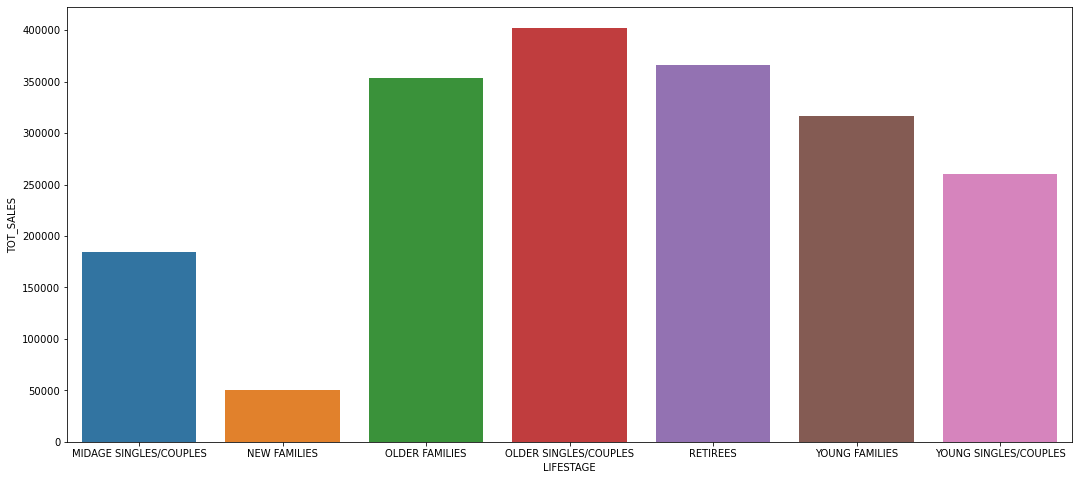

In [151]:
sales_by_lifestage_1 = merged_df.groupby(['LIFESTAGE'], as_index= False).agg({'TOT_SALES':'sum'})

plt.figure(figsize=(18,8))
sns.barplot(x= sales_by_lifestage_1['LIFESTAGE'], y= sales_by_lifestage_1['TOT_SALES'])

The above plot shows "OLDER SINGLES/COUPLES" spends most on chips, followed by "RETIREES" and then "OLDER FAMILIES".

<AxesSubplot:xlabel='PREMIUM_CUSTOMER', ylabel='TOT_SALES'>

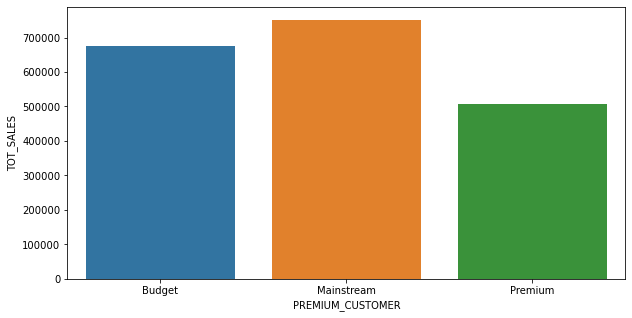

In [300]:
sales_by_lifestage_2 = merged_df.groupby(['PREMIUM_CUSTOMER'], as_index= False).agg({'TOT_SALES':'sum'})

plt.figure(figsize=(10,5))
sns.barplot(x= sales_by_lifestage_2['PREMIUM_CUSTOMER'], y= sales_by_lifestage_2['TOT_SALES'])

Most of the sales are comming from "Mainstream Customers", then from "Budget Customers" and then from "Premium Costomers".

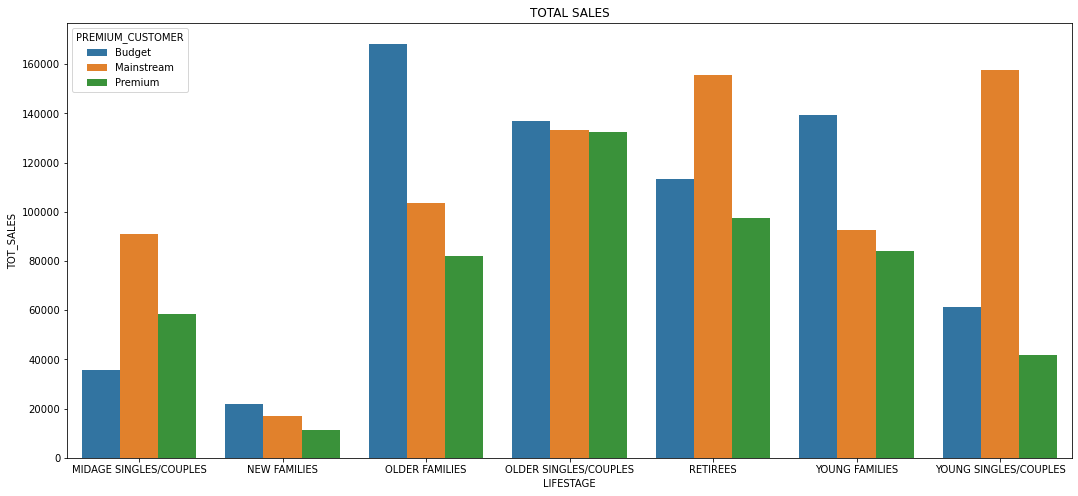

In [199]:
plt.figure(figsize=(18,8))
sns.barplot(x= sales_by_lifestage['LIFESTAGE'], y= sales_by_lifestage['TOT_SALES'], hue= sales_by_lifestage['PREMIUM_CUSTOMER'])
plt.title('TOTAL SALES');

 sales are coming mainly from "Budget-Older Families", "Mainstream-Retirees" and "Mainstream-Young Singles/Couples.

# How many customers are in each segment

In [131]:
#here we use purchase behaviour table
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [136]:
cust_category = purchase_behaviour.groupby(['LIFESTAGE'], as_index= False).agg({'LYLTY_CARD_NBR':'count'})

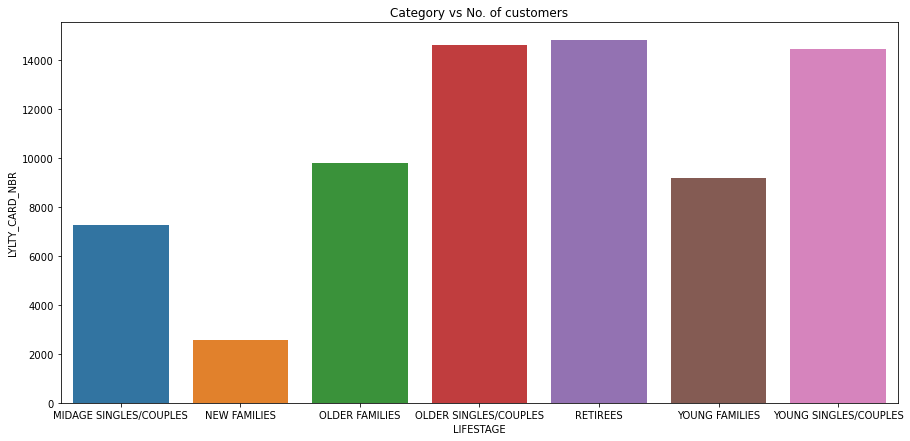

In [142]:
plt.figure(figsize=(15,7))
sns.barplot(x= cust_category['LIFESTAGE'], y= cust_category['LYLTY_CARD_NBR']);
plt.title("Category vs No. of customers");

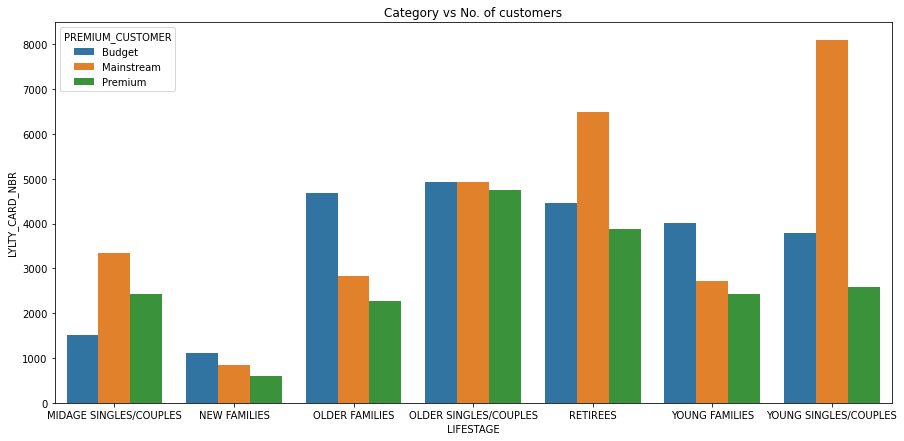

In [200]:
cust_category_pre = purchase_behaviour.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'],
                                               as_index= False).agg({'LYLTY_CARD_NBR':'count'})
plt.figure(figsize=(15,7))
sns.barplot(x= cust_category_pre['LIFESTAGE'], y= cust_category_pre['LYLTY_CARD_NBR'], hue= cust_category_pre['PREMIUM_CUSTOMER']);
plt.title("Category vs No. of customers");

There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

# How many chips are bought per customer by segment

In [152]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,size,brand,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [173]:
customer_1 = merged_df.groupby(['LYLTY_CARD_NBR','LIFESTAGE'], as_index=False).agg({'PROD_QTY':'sum','TOT_SALES':'sum'})

# here we have to drop 1 customer who is purchasing 200 packets at a time, for our analysis
customer_1[customer_1['PROD_QTY'] == 400]

,LYLTY_CARD_NBR,LIFESTAGE,PROD_QTY,TOT_SALES
59694,226000,OLDER FAMILIES,400,1300.0


In [175]:
customer_1.drop(index=59694, inplace= True)

In [177]:
customer_2 = customer_1.groupby(['LIFESTAGE'], as_index=False).agg({'PROD_QTY':'mean'})
customer_2

,LIFESTAGE,PROD_QTY
0,MIDAGE SINGLES/COUPLES,6.559588
1,NEW FAMILIES,5.040016
2,OLDER FAMILIES,9.672973
3,OLDER SINGLES/COUPLES,7.132795
4,RETIREES,6.360419
5,YOUNG FAMILIES,9.213445
6,YOUNG SINGLES/COUPLES,4.614223


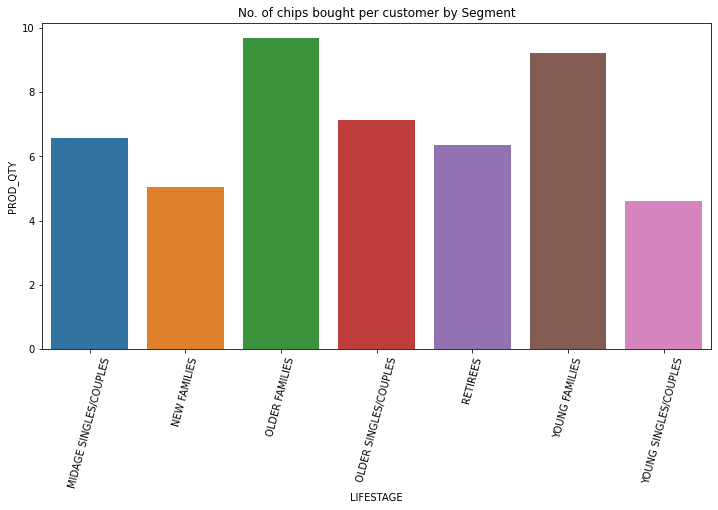

In [201]:
plt.figure(figsize=(12,6))
sns.barplot(x= customer_2['LIFESTAGE'], y= customer_2['PROD_QTY'])
plt.xticks(rotation = 75)
plt.title("No. of chips bought per customer by Segment");

"Older families" and "young families" in general buy more chips per customer.

# What's the average chip price by customer segment

In [183]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,size,brand,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [185]:
sub_df= merged_df[['LIFESTAGE','PREMIUM_CUSTOMER','PROD_QTY','TOT_SALES']]
sub_df

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,TOT_SALES
0,YOUNG SINGLES/COUPLES,Premium,2,6.0
1,MIDAGE SINGLES/COUPLES,Budget,3,6.3
2,MIDAGE SINGLES/COUPLES,Budget,2,2.9
3,MIDAGE SINGLES/COUPLES,Budget,5,15.0
4,MIDAGE SINGLES/COUPLES,Budget,3,13.8
...,...,...,...,...
264831,YOUNG SINGLES/COUPLES,Premium,2,10.8
264832,YOUNG SINGLES/COUPLES,Premium,1,4.4
264833,YOUNG SINGLES/COUPLES,Premium,2,8.8
264834,YOUNG SINGLES/COUPLES,Premium,2,7.8


In [186]:
sub_df['avg_price'] = sub_df['TOT_SALES']/sub_df['PROD_QTY']

<ipython-input-186-2e45daf6c2da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['avg_price'] = sub_df['TOT_SALES']/sub_df['PROD_QTY']


In [187]:
sub_df

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,TOT_SALES,avg_price
0,YOUNG SINGLES/COUPLES,Premium,2,6.0,3.00
1,MIDAGE SINGLES/COUPLES,Budget,3,6.3,2.10
2,MIDAGE SINGLES/COUPLES,Budget,2,2.9,1.45
3,MIDAGE SINGLES/COUPLES,Budget,5,15.0,3.00
4,MIDAGE SINGLES/COUPLES,Budget,3,13.8,4.60
...,...,...,...,...,...
264831,YOUNG SINGLES/COUPLES,Premium,2,10.8,5.40
264832,YOUNG SINGLES/COUPLES,Premium,1,4.4,4.40
264833,YOUNG SINGLES/COUPLES,Premium,2,8.8,4.40
264834,YOUNG SINGLES/COUPLES,Premium,2,7.8,3.90


In [190]:
avg_price_df= sub_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'], as_index= False).agg({'avg_price':'mean'})

Text(0.5, 1.0, 'Average chip price VS Customer segment')

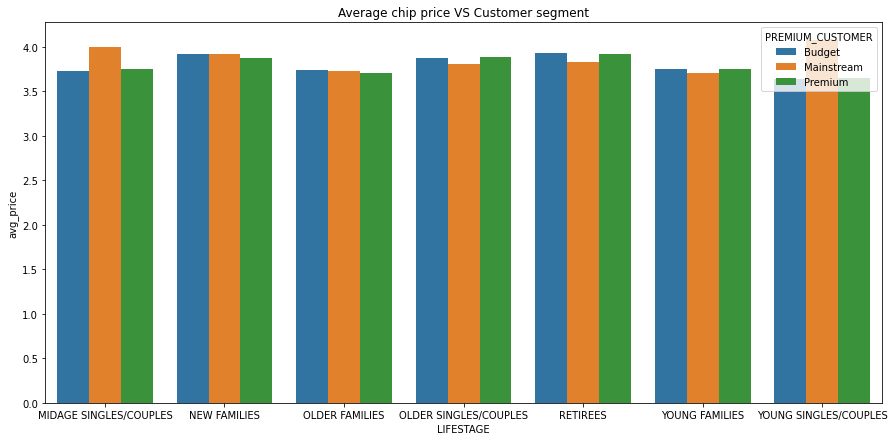

In [203]:
plt.figure(figsize=(15,7))
sns.barplot(x= avg_price_df['LIFESTAGE'], y= avg_price_df['avg_price'],hue= avg_price_df['PREMIUM_CUSTOMER'])
plt.title("Average chip price VS Customer segment")

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy 
chips, this is mainly for entertainment purposes rather than their own consumption.This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.


## Now let us fromulate a hypothesis test regarding average chip price for Mainstream VS Budget and Premium counterparts of Midage Singles/Couples weather the difference in average chip price is statistically significant.

we will first create separate datasets for mainstream Midage Singles/Couples and Budget+Premium Midage Singles/Couples 

In [204]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,size,brand,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [222]:
chip_price_Mainstream_midage = sub_df.loc[(sub_df['PREMIUM_CUSTOMER']== 'Mainstream')
                                          & (sub_df['LIFESTAGE']== 'MIDAGE SINGLES/COUPLES')]["avg_price"]
MP = chip_price_Mainstream_midage.values

In [223]:
chip_price_Bud_pre_midage = sub_df.loc[(sub_df['PREMIUM_CUSTOMER']== 'Budget') | (sub_df['PREMIUM_CUSTOMER']== 'Premium')
                                          & (sub_df['LIFESTAGE']== 'MIDAGE SINGLES/COUPLES')]["avg_price"]
BPP = chip_price_Bud_pre_midage.values

In [224]:
MP,BPP 

(array([4.4, 4.4, 5.4, ..., 4.4, 4.6, 4.4]),
 array([2.1 , 1.45, 3.  , ..., 4.6 , 3.9 , 4.2 ]))

lets state our null hypothesis- Ho- there is no difference in average price, i.e. Uo= 0 and
          alternate hypothesis- Ha - Uo != 0



we will conduct a t-statistic test, where population variance is unknown and assumed to be equal, at a significance level of 5%


In [265]:
#lets calculate sample mean of our datasets
MP_mean = MP.mean()
BPP_mean =BPP.mean()
MP_mean, BPP_mean

(4.000101061141991, 3.7901218273110193)

In [266]:
#Lets calculate sample varience of our dataset
MP_var = MP.var()
BPP_var = BPP.var()
MP_var, BPP_var

(1.1220351085334876, 1.2492434237462906)

In [268]:
#lets calculate pooled varience
pooled_var = ((len(MP)-1)*MP_var + (len(BPP)-1)*BPP_var)/(len(MP)-1 + len(BPP)-1)
pooled_var

1.2359064611738007

In [270]:
#Lets calculate T-score
T_score = (MP_mean-BPP_mean)/np.sqrt((MP_var/len(MP))+(BPP_var/len(BPP)))
T_score

20.316710504670773

In [272]:
# Lets calculate p value from our eatimated T_score from a online calculator
p_value = 0.00001

since our p_value(0.0001) is much less than our significance level(0.05), that means there is enough statistical significance
to reject our null hypothesis. Which means there is a difference in average chip price of MAINSTREAM and BUDGET+PREMIUM 
customers of MIDAGE SINGLE/COUPLES category.

# Lets deep dive into specific customer segments for insights

We will look at MAINSTREAM YOUNG SINGLES/COUPLES category as this category has highest number of customers and drives
majority of sales.

In [388]:
young_df = merged_df.loc[(merged_df['PREMIUM_CUSTOMER']== 'Mainstream')
         & (merged_df['LIFESTAGE']== 'YOUNG SINGLES/COUPLES')]
young_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,size,brand,LIFESTAGE,PREMIUM_CUSTOMER,Price
237702,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag&Sauce 150g,1,2.6,150g,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
237703,2018-08-17,1,1163,188,46,Kettle Original 175g,1,5.4,175g,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
237704,2018-08-14,1,1291,333,27,WW Supreme Cheese Corn Chips 200g,1,1.9,200g,WOOLWORTHS,YOUNG SINGLES/COUPLES,Mainstream,1.9
237705,2019-05-15,3,3031,1227,14,Smiths Crnkle Chip Orgnl Big Bag 380g,1,5.9,380g,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.9
237706,2019-05-18,3,3118,1574,62,Pringles Mystery Flavour 134g,1,3.7,134g,Pringles,YOUNG SINGLES/COUPLES,Mainstream,3.7


<AxesSubplot:xlabel='brand'>

<Figure size 1440x504 with 0 Axes>

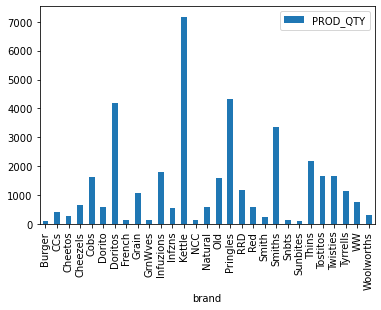

In [263]:
plt.figure(figsize=(20,7))
young_df.groupby(['brand']).agg({'PROD_QTY':'sum'}).plot(kind='bar')

<AxesSubplot:>

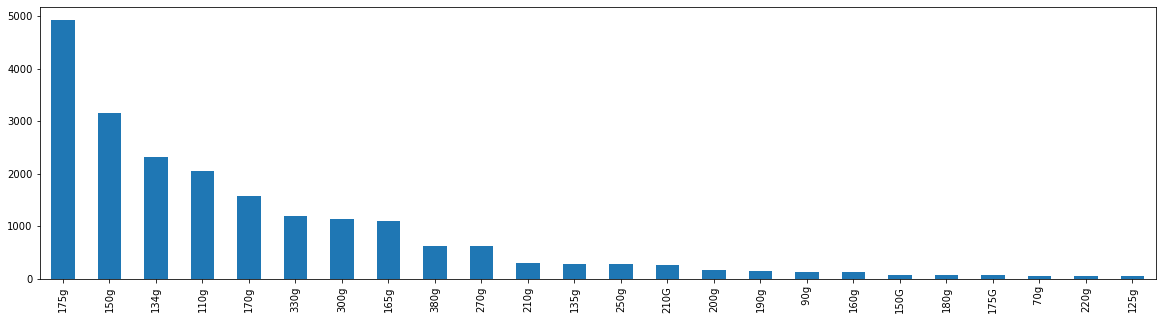

In [299]:
# lets check weather MAINSTREAM YOUNG SINGLES/COUPLES category tends to buy larger Packet Size.
plt.figure(figsize=(20,5))
young_df['size'].value_counts().plot(kind='bar')

seems like our target segment buys chips of size 175g and 150g more than larger pact size.

<AxesSubplot:>

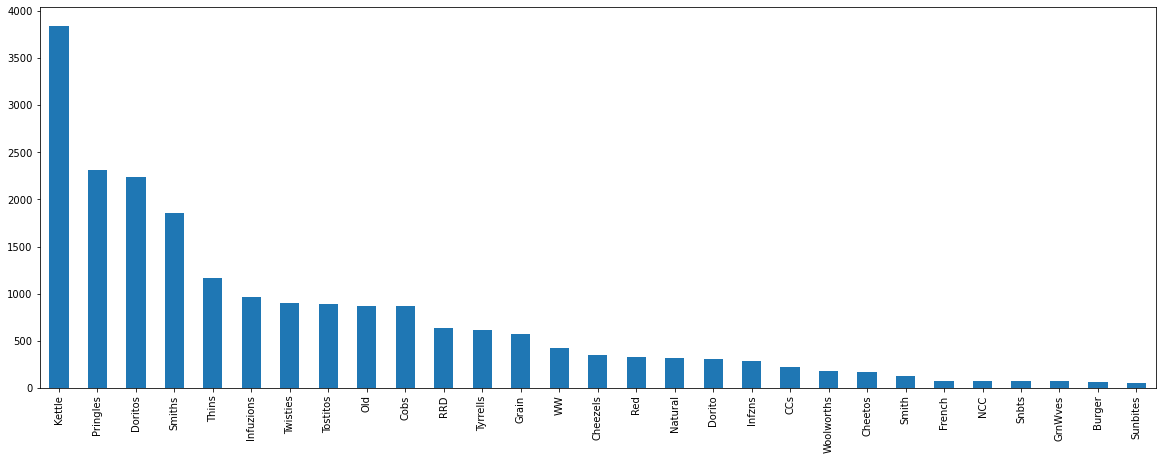

In [231]:
# lets look at brands this MAINSTREAM YOUNG SINGLES/COUPLES category purchases most.
plt.figure(figsize=(20,7))
young_df['brand'].value_counts().plot(kind='bar')

The top 4 Brands which these MAINSTREAM YOUNG SINGLES/COUPLES category purchases are "KETTLE", "PRINGLES", "DORITOS", "SMITHS".

In [237]:
# different packet sizes of top brands
young_df[young_df['brand']=='Kettle']['size'].value_counts()

150g    1778
175g    1776
135g     290
Name: size, dtype: int64

## Implementing Market Basket Analysis for MAINSTREAM YOUNG SINGLES/COUPLES Category Customers

In [304]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [386]:
# little data cleaning for brand names
merged_df['brand'] = np.where(merged_df['brand'] == 'RED', "RRD", merged_df['brand'])

In [387]:
merged_df['brand'] = np.where(merged_df['brand'] == "SNBTS", "SUNBITES", merged_df['brand'])
merged_df['brand'] = np.where(merged_df['brand'] == 'INFZNS', "INFUZIONS", merged_df['brand'])
merged_df['brand'] = np.where(merged_df['brand'] == 'WW', "WOOLWORTHS", merged_df['brand'])
merged_df['brand'] = np.where(merged_df['brand'] == 'SMITH', "SMITHS", merged_df['brand'])
merged_df['brand'] = np.where(merged_df['brand'] == 'NCC', "NATURAL", merged_df['brand'])
merged_df['brand'] = np.where(merged_df['brand'] == 'DORITO', "DORITOS", merged_df['brand'])
merged_df['brand'] = np.where(merged_df['brand'] == 'GRAIN', "GRNWVES", merged_df['brand'])

In [323]:
young_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,size,brand,LIFESTAGE,PREMIUM_CUSTOMER,Price
237702,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag&Sauce 150g,1,2.6,150g,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
237703,2018-08-17,1,1163,188,46,Kettle Original 175g,1,5.4,175g,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
237704,2018-08-14,1,1291,333,27,WW Supreme Cheese Corn Chips 200g,1,1.9,200g,WOOLWORTHS,YOUNG SINGLES/COUPLES,Mainstream,1.9
237705,2019-05-15,3,3031,1227,14,Smiths Crnkle Chip Orgnl Big Bag 380g,1,5.9,380g,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.9
237706,2019-05-18,3,3118,1574,62,Pringles Mystery Flavour 134g,1,3.7,134g,Pringles,YOUNG SINGLES/COUPLES,Mainstream,3.7


In [324]:
young_df.to_csv('young_df.csv')

In [404]:
df = pd.read_csv("young_df.csv")
df.head()

,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,size,brand,LIFESTAGE,PREMIUM_CUSTOMER,Price
0,237702,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag&Sauce 150g,1,2.6,150g,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
1,237703,2018-08-17,1,1163,188,46,Kettle Original 175g,1,5.4,175g,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
2,237704,2018-08-14,1,1291,333,27,WW Supreme Cheese Corn Chips 200g,1,1.9,200g,WOOLWORTHS,YOUNG SINGLES/COUPLES,Mainstream,1.9
3,237705,2019-05-15,3,3031,1227,14,Smiths Crnkle Chip Orgnl Big Bag 380g,1,5.9,380g,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.9
4,237706,2019-05-18,3,3118,1574,62,Pringles Mystery Flavour 134g,1,3.7,134g,Pringles,YOUNG SINGLES/COUPLES,Mainstream,3.7


In [405]:
# Data Cleaning
df['brand']= df['brand'].str.strip()
df.dropna(subset=['LYLTY_CARD_NBR'], inplace= True)
df['LYLTY_CARD_NBR'] = df['LYLTY_CARD_NBR'].astype('str')


In [407]:
my_basket = df.groupby(['LYLTY_CARD_NBR','brand']).agg({'PROD_QTY':'sum'}).unstack().reset_index().fillna(0).set_index('LYLTY_CARD_NBR')
my_basket.head()

PROD_QTY                                                   \
brand            Burger  CCs Cheetos Cheezels Cobs Dorito Doritos French   
LYLTY_CARD_NBR                                                             
100039              0.0  0.0     0.0      0.0  0.0    0.0     2.0    0.0   
100044              0.0  0.0     0.0      0.0  0.0    0.0     2.0    0.0   
100047              0.0  0.0     0.0      0.0  0.0    0.0     4.0    0.0   
100057              0.0  0.0     0.0      2.0  0.0    0.0     0.0    0.0   
100070              0.0  0.0     0.0      0.0  0.0    0.0     2.0    0.0   

                              ...                                             \
brand          Grain GrnWves  ... Smith Smiths Snbts Sunbites Thins Tostitos   
LYLTY_CARD_NBR                ...                                              
100039           0.0     0.0  ...   0.0    2.0   0.0      2.0   0.0      0.0   
100044           0.0     0.0  ...   0.0    2.0   0.0      0.0   0.0      0.0   
100047           0.0     0.0  ...   0.0    4.0   0.0      0.0   0.0      0.0   
100057           0.0     0.0  ...   0.0    2.0   0.0      0.0   0.0      2.0   
100070           0.0     0.0  ...   0.0    0.0   0.0      0.0   0.0      0.0   

                                                        
brand          Twisties Tyrrells WOOLWORTHS Woolworths  
LYLTY_CARD_NBR                                          
100039              0.0      2.0        0.0        0.0  
100044              0.0      0.0        2.0        0.0  
100047              0.0      0.0        0.0        0.0  
100057              0.0      0.0        0.0        0.0  
100070              0.0      0.0        0.0        0.0  

[5 rows x 29 columns]

In [408]:
# Converting Values greater than 1 to 1 and keeping 0 as zero

def my_encoder(x):
    if x >= 1:
        return 1
    else:
        return 0
    
my_basket_sets = my_basket.applymap(my_encoder)

In [409]:
my_basket_sets

PROD_QTY                                                        \
brand            Burger CCs Cheetos Cheezels Cobs Dorito Doritos French Grain   
LYLTY_CARD_NBR                                                                  
100039                0   0       0        0    0      0       1      0     0   
100044                0   0       0        0    0      0       1      0     0   
100047                0   0       0        0    0      0       1      0     0   
100057                0   0       0        1    0      0       0      0     0   
100070                0   0       0        0    0      0       1      0     0   
...                 ...  ..     ...      ...  ...    ...     ...    ...   ...   
99370                 0   0       0        0    0      0       0      0     0   
99396                 0   0       0        0    0      0       0      0     0   
99420                 0   0       0        0    0      0       0      0     0   
99433                 0   0       0        0    0      0       0      0     0   
99501                 0   0       1        0    0      0       0      0     0   

                        ...                                             \
brand          GrnWves  ... Smith Smiths Snbts Sunbites Thins Tostitos   
LYLTY_CARD_NBR          ...                                              
100039               0  ...     0      1     0        1     0        0   
100044               0  ...     0      1     0        0     0        0   
100047               0  ...     0      1     0        0     0        0   
100057               0  ...     0      1     0        0     0        1   
100070               0  ...     0      0     0        0     0        0   
...                ...  ...   ...    ...   ...      ...   ...      ...   
99370                0  ...     0      0     0        0     0        0   
99396                0  ...     0      1     0        0     0        0   
99420                0  ...     0      1     0        0     0        0   
99433                0  ...     0      1     0        0     0        0   
99501                0  ...     0      0     0        0     0        0   

                                                        
brand          Twisties Tyrrells WOOLWORTHS Woolworths  
LYLTY_CARD_NBR                                          
100039                0        1          0          0  
100044                0        0          1          0  
100047                0        0          0          0  
100057                0        0          0          0  
100070                0        0          0          0  
...                 ...      ...        ...        ...  
99370                 0        0          0          1  
99396                 0        0          0          0  
99420                 0        0          0          0  
99433                 0        0          0          0  
99501                 0        0          0          0  

[8088 rows x 29 columns]

## Training Model

In [412]:
# generating frequent Itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support= 0.05, use_colnames= True)

In [413]:
my_frequent_itemsets

,support,itemsets
0,0.101632,"((PROD_QTY, Cobs))"
1,0.238872,"((PROD_QTY, Doritos))"
2,0.068620,"((PROD_QTY, Grain))"
3,0.109792,"((PROD_QTY, Infuzions))"
4,0.378956,"((PROD_QTY, Kettle))"
5,0.101632,"((PROD_QTY, Old))"
6,0.250742,"((PROD_QTY, Pringles))"
7,0.070722,"((PROD_QTY, RRD))"
8,0.193744,"((PROD_QTY, Smiths))"
9,0.133160,"((PROD_QTY, Thins))"


In [431]:
# Generating rules
my_rules = association_rules(my_frequent_itemsets, metric= 'lift', min_threshold= 0.8)

In [432]:
# Viewing top 100 rules
my_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((PROD_QTY, Doritos))","((PROD_QTY, Kettle))",0.238872,0.378956,0.082097,0.343685,0.906926,-0.008425,0.946259
1,"((PROD_QTY, Kettle))","((PROD_QTY, Doritos))",0.378956,0.238872,0.082097,0.216639,0.906926,-0.008425,0.971619
2,"((PROD_QTY, Pringles))","((PROD_QTY, Doritos))",0.250742,0.238872,0.057740,0.230276,0.964013,-0.002155,0.988832
3,"((PROD_QTY, Doritos))","((PROD_QTY, Pringles))",0.238872,0.250742,0.057740,0.241718,0.964013,-0.002155,0.988100
4,"((PROD_QTY, Pringles))","((PROD_QTY, Kettle))",0.250742,0.378956,0.089515,0.357002,0.942066,-0.005505,0.965856
5,"((PROD_QTY, Kettle))","((PROD_QTY, Pringles))",0.378956,0.250742,0.089515,0.236215,0.942066,-0.005505,0.980981
6,"((PROD_QTY, Smiths))","((PROD_QTY, Kettle))",0.193744,0.378956,0.072453,0.373963,0.986823,-0.000967,0.992024
7,"((PROD_QTY, Kettle))","((PROD_QTY, Smiths))",0.378956,0.193744,0.072453,0.191191,0.986823,-0.000967,0.996844
8,"((PROD_QTY, Thins))","((PROD_QTY, Kettle))",0.133160,0.378956,0.050198,0.376973,0.994766,-0.000264,0.996817
9,"((PROD_QTY, Kettle))","((PROD_QTY, Thins))",0.378956,0.133160,0.050198,0.132463,0.994766,-0.000264,0.999197


# Affinity Analysis

We might want to target customer segments that contribute the most to sales to retain them or further
increase sales. Let’s look at Mainstream - young singles/couples. For instance, let’s find out if they tend to
buy a particular brand of chips.

In [389]:
young_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,size,brand,LIFESTAGE,PREMIUM_CUSTOMER,Price
237702,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag&Sauce 150g,1,2.6,150g,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
237703,2018-08-17,1,1163,188,46,Kettle Original 175g,1,5.4,175g,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
237704,2018-08-14,1,1291,333,27,WW Supreme Cheese Corn Chips 200g,1,1.9,200g,WOOLWORTHS,YOUNG SINGLES/COUPLES,Mainstream,1.9
237705,2019-05-15,3,3031,1227,14,Smiths Crnkle Chip Orgnl Big Bag 380g,1,5.9,380g,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.9
237706,2019-05-18,3,3118,1574,62,Pringles Mystery Flavour 134g,1,3.7,134g,Pringles,YOUNG SINGLES/COUPLES,Mainstream,3.7


In [423]:
other_df = merged_df.loc[(merged_df['PREMIUM_CUSTOMER'] != 'Mainstream')
         & (merged_df['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES')]

In [396]:
target_df = young_df.groupby(['brand'], as_index= False).agg({'PROD_QTY':'sum'})
target_df.head()

,brand,PROD_QTY
0,Burger,106
1,CCs,405
2,Cheetos,291
3,Cheezels,651
4,Cobs,1617


In [393]:
other_df = other_df.groupby(['brand'], as_index= False).agg({'PROD_QTY':'sum'})
other_df.head()

,brand,PROD_QTY
0,Burger,1723
1,CCs,4861
2,Cheetos,3099
3,Cheezels,4982
4,Cobs,10133


In [394]:
tot_qty_sum_target = young_df['PROD_QTY'].sum()
tot_qty_sum_target

38632

In [395]:
tot_qty_sum_other = other_df['PROD_QTY'].sum()
tot_qty_sum_other

283157

In [397]:
target_df['TARGET'] = target_df['PROD_QTY']/tot_qty_sum_target

In [398]:
other_df['OTHER'] = other_df['PROD_QTY']/tot_qty_sum_other

In [401]:
affinity_df = target_df.merge(other_df, how='left', on= 'brand')[['brand','TARGET','OTHER']]
affinity_df.head()

,brand,TARGET,OTHER
0,Burger,0.002744,0.006085
1,CCs,0.010484,0.017167
2,Cheetos,0.007533,0.010944
3,Cheezels,0.016851,0.017594
4,Cobs,0.041856,0.035786


In [402]:
affinity_df['AFFINITY_TO_BRAND'] = affinity_df['TARGET']/affinity_df['OTHER']

In [403]:
affinity_df.sort_values('AFFINITY_TO_BRAND',ascending=False)

,brand,TARGET,OTHER,AFFINITY_TO_BRAND
26,Tyrrells,0.029587,0.023934,1.236200
25,Twisties,0.043306,0.035306,1.226610
12,Kettle,0.185649,0.155024,1.197555
11,Infzns,0.014004,0.011700,1.196895
24,Tostitos,0.042581,0.035694,1.192954
15,Old,0.041598,0.034882,1.192534
16,Pringles,0.111980,0.094107,1.189921
8,Grain,0.027309,0.023167,1.178769
4,Cobs,0.041856,0.035786,1.169640
6,Doritos,0.108149,0.093160,1.160888


 Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the
rest of the population.
 Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest
of the population


#### Let’s also find out if our target segment tends to buy larger packs of chips.

In [427]:
target_df = young_df.groupby(['size'], as_index= False).agg({'PROD_QTY':'sum'})

other_df = other_df.groupby(['size'], as_index= False).agg({'PROD_QTY':'sum'})

tot_qty_sum_target = young_df['PROD_QTY'].sum()

tot_qty_sum_other = other_df['PROD_QTY'].sum()

target_df['TARGET'] = target_df['PROD_QTY']/tot_qty_sum_target

other_df['OTHER'] = other_df['PROD_QTY']/tot_qty_sum_other

affinity_df = target_df.merge(other_df, how='left', on= 'size')[['size','TARGET','OTHER']]

affinity_df['AFFINITY_TO_BRAND'] = affinity_df['TARGET']/affinity_df['OTHER']

affinity_df.sort_values('AFFINITY_TO_BRAND',ascending=False)

,size,TARGET,OTHER,AFFINITY_TO_BRAND
20,270g,0.029846,0.023333,1.279102
17,210g,0.014496,0.011633,1.246076
22,330g,0.057465,0.047444,1.211233
2,110g,0.099658,0.083371,1.195364
23,380g,0.030156,0.025343,1.189936
4,134g,0.111980,0.094107,1.189921
5,135g,0.013849,0.012036,1.150626
19,250g,0.013460,0.011972,1.124304
16,210G,0.012813,0.011534,1.110885
10,170g,0.075740,0.074782,1.012817


It looks like Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips compared to the rest of the population. 

But let’s dive into what brands sell this pack size.

In [430]:
young_df[young_df['size'] == "270g"]['PROD_NAME'].value_counts()

Twisties Cheese     270g    315
Twisties Chicken270g        305
Name: PROD_NAME, dtype: int64

Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of
purchasing Twisties.

In [243]:
# MAINSTREAM RETIREES segment
retirees_df = merged_df.loc[(merged_df['PREMIUM_CUSTOMER']== 'Mainstream')
         & (merged_df['LIFESTAGE']== 'RETIREES')]
retirees_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,size,brand,LIFESTAGE,PREMIUM_CUSTOMER
150306,2018-07-01,77,77456,75408,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4,150g,Red,RETIREES,Mainstream
150307,2019-05-14,1,1461,542,96,WW Original Stacked Chips 160g,1,1.9,160g,WW,RETIREES,Mainstream
150308,2019-05-19,2,2125,721,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150g,Doritos,RETIREES,Mainstream
150309,2018-08-15,2,2437,1052,43,Smith Crinkle Cut Bolognese 150g,2,5.2,150g,Smith,RETIREES,Mainstream
150310,2019-05-18,3,3212,2011,24,Grain Waves Sweet Chilli 210g,1,3.6,210g,Grain,RETIREES,Mainstream


<AxesSubplot:>

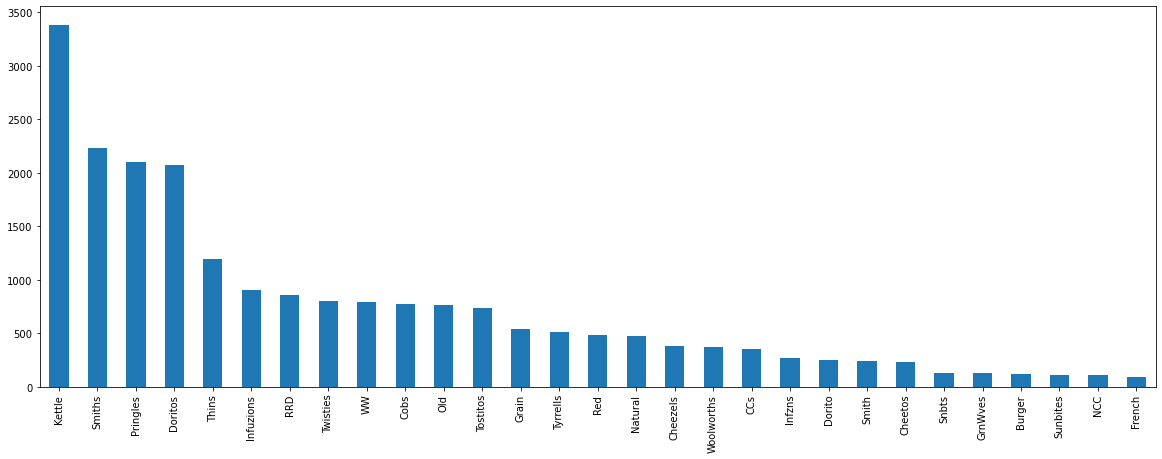

In [244]:
plt.figure(figsize=(20,7))
retirees_df['brand'].value_counts().plot(kind='bar')

In [245]:
# OLDER FAMILIES BUDGET segment
older_df = merged_df.loc[(merged_df['PREMIUM_CUSTOMER']== 'Budget')
         & (merged_df['LIFESTAGE']== 'OLDER FAMILIES')]
older_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,size,brand,LIFESTAGE,PREMIUM_CUSTOMER
32030,2018-07-21,77,2330461,236777,87,Infuzions BBQ Rib Prawn Crackers 110g,1,3.8,110g,Infuzions,OLDER FAMILIES,Budget
32031,2019-05-20,1,1367,424,7,Smiths Crinkle Original 330g,1,5.7,330g,Smiths,OLDER FAMILIES,Budget
32032,2018-08-20,2,2043,637,41,Doritos Salsa Mild 300g,1,2.6,300g,Doritos,OLDER FAMILIES,Budget
32033,2018-08-17,3,3088,1462,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,Kettle,OLDER FAMILIES,Budget
32034,2018-08-14,3,3147,1698,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330g,Smiths,OLDER FAMILIES,Budget


<AxesSubplot:>

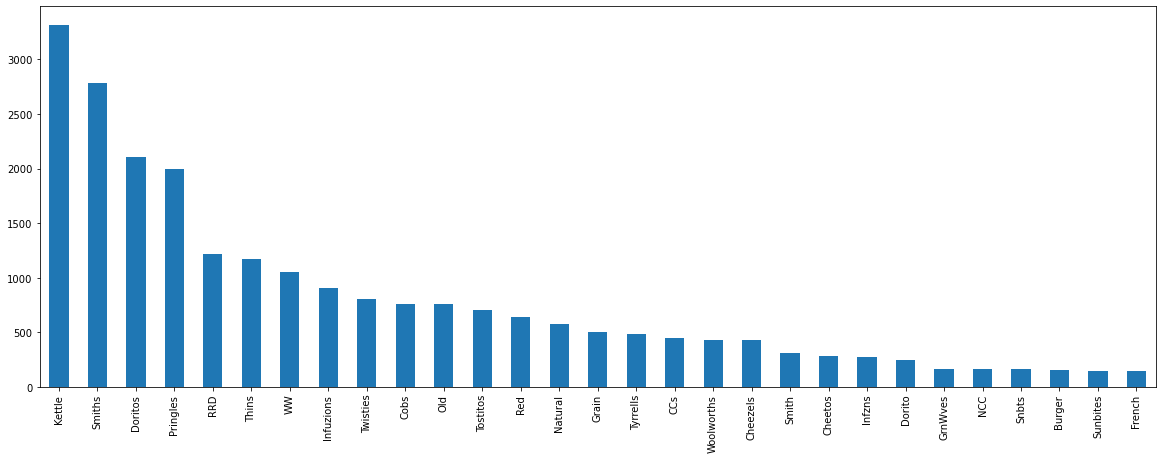

In [246]:
plt.figure(figsize=(20,7))
older_df['brand'].value_counts().plot(kind='bar')

##### KETTLE is most consumed brand in different categories of customer segment which drives most sales.

<AxesSubplot:>

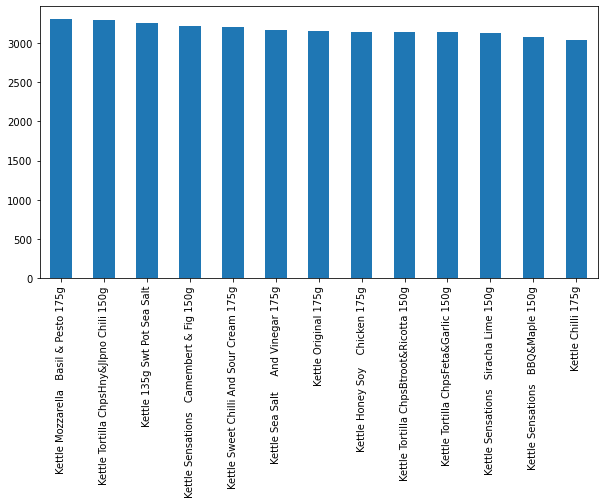

In [279]:
# different products of Kettle Brand
plt.figure(figsize=(10,5))
merged_df['PROD_NAME'][merged_df['PROD_NAME'].str.contains('Kettle')].value_counts().plot(kind='bar')

### Let's compare average price of kettle brand with other brands for different packet sizes.

In [281]:
merged_df['Price'] = merged_df['TOT_SALES']/merged_df['PROD_QTY']

In [283]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,size,brand,LIFESTAGE,PREMIUM_CUSTOMER,Price
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60


In [290]:
Kettle_brand=merged_df[['size','Price']][merged_df['brand']== 'Kettle'].groupby(['size'], as_index= False).agg({'Price':'mean'})
Kettle_brand

,size,Price
0,135g,4.200000
1,150g,4.599613
2,175g,5.399546


In [295]:
other_brand=merged_df[['size','Price']][merged_df['brand'] != 'Kettle'].groupby(['size'], as_index= False).agg({'Price':'mean'})
other_brand

,size,Price
0,70g,2.400000
1,90g,1.700000
2,110g,3.799915
3,125g,2.100000
4,134g,3.699838
5,150G,2.700000
6,150g,3.005476
7,160g,1.900000
8,165g,3.486331
9,170g,3.846597


In [293]:
# Comparing KETTLE brand vs Other brands on Pack Size and Average Price.
Kettle_brand.merge(other_brand, left_on= 'size', right_on= 'size')

,size,Price_x,Price_y
0,150g,4.599613,3.005476
1,175g,5.399546,3.210039


Average price of KETTLE brand for different packet sizes is higher than rest of the brands, and its sales quantity wise is also
high which means KETTLE Products are quite popular among customers.

# SUMMARY

1) "OLDER SINGLES/COUPLES" spends most on chips, followed by "RETIREES" and then "OLDER FAMILIES", and in terms of premium customers "MAINSTREAM" category derives most sale.

2) Most of the sales are coming mainly from "Budget-Older Families", "Mainstream-Retirees" and 
"Mainstream-Young Singles/Couples.

3) There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment, reason for that may be Older Families buys more chip packet per customer as suggested by data.

4) "Older families" and "young families" in general buy more chips packet per customer.

5) MAINSTREAM MIDAGE SINGLES/COUPLES and MAINSTREAM YOUNG SINGLES/COUPLES are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption.This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

6) The top 4 Brands which these MAINSTREAM YOUNG SINGLES/COUPLES category purchases are "KETTLE", "PRINGLES", "DORITOS", "SMITHS".

7) KETTLE is most consumed brand in different categories of customer segment which drives most sales. Most sold chip packet size is 150 gms and 175 gms. 

8) Average price of KETTLE brand for different packet sizes is higher than rest of the brands, and its sales quantity wise is also high which means KETTLE Products are quite popular among customers.

9) MAINSTREAM YOUNG SINGLES/COUPLES are 23% more likely to purchase "Tyrrells" chips compared to the rest of the population. MAINSTREAM YOUNG SINGLES/COUPLES are 56% less likely to purchase Burger Rings compared to the rest of the population.

10) It looks like MAINSTREAM YOUNG SINGLES/COUPLES are 27% more likely to purchase a 270g pack of chips compared to the rest of the population. And Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of purchasing Twisties.